# To Do

***Developer route: visualiser dashboard.
Quantitative: look at ETFs, look at ownership --> flows***

***Work on Book --> look at Joel's equal-weight strategy for how to not use notebooks***

***Start looking at Forward Starting Swaps***

***Make Z scores rolling***

***IRS Spreads + Flys***

***Look at FRA-OIS***

***Carry & Roll***

***Matrix between maturities with each box showing the simple curve spread between them. Could then do 1d, 1w, 1m changes in the boxes***

***Have a basic table which tells you where curve spreads are***

***Do like Hugodevere: bar chart with all assets here in order of biggest absolute move in 1d, 1w, 1m period. Could then do biggest relative moves (i.e. Z scores)***

***Calculate implied probabilities of hikes + implied number of hikes***

In [1]:
import eikon as ek
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date

# Access Eikon API

In [2]:
# LINK TO API
ek.set_app_key('32fcad38f7f74ef0a76b87567f384987a11d91bf')

# Read in Data

***UK Cash Yield Curve***

In [3]:
uk_2y = ek.get_timeseries('GB2YT=RR')['OPEN']
uk_3y = ek.get_timeseries('GB3YT=RR')['OPEN']
uk_5y = ek.get_timeseries('GB5YT=RR')['OPEN']
uk_7y = ek.get_timeseries('GB7YT=RR')['OPEN']
uk_10y = ek.get_timeseries('GB10YT=RR')['OPEN']
uk_20y = ek.get_timeseries('GB20YT=RR')['OPEN']
uk_30y = ek.get_timeseries('GB30YT=RR')['OPEN']
uk_50y = ek.get_timeseries('GB50YT=RR')['OPEN']

***UK OIS***

In [4]:
uk_ois_1m = ek.get_timeseries('GBP1MOIS=')['CLOSE']
uk_ois_2m = ek.get_timeseries('GBP2MOIS=')['CLOSE']
uk_ois_3m = ek.get_timeseries('GBP3MOIS=')['CLOSE']
uk_ois_6m = ek.get_timeseries('GBP6MOIS=')['CLOSE']
uk_ois_9m = ek.get_timeseries('GBP9MOIS=')['CLOSE']
uk_ois_1y = ek.get_timeseries('GBP1YOIS=')['CLOSE']
uk_ois_18m = ek.get_timeseries('GBP18MOIS=')['CLOSE']
uk_ois_2y = ek.get_timeseries('GBP2YOIS=')['CLOSE']
uk_ois_3y = ek.get_timeseries('GBP3YOIS=')['CLOSE']
uk_ois_4y = ek.get_timeseries('GBP4YOIS=')['CLOSE']
uk_ois_5y = ek.get_timeseries('GBP5YOIS=')['CLOSE']

***MPC OIS Fixings("Money" section of RV)***

In [5]:
MPC_1 = ek.get_timeseries('GBPOISCB1X2=R')['CLOSE']
MPC_2 = ek.get_timeseries('GBPOISCB2X3=R')['CLOSE']
MPC_3 = ek.get_timeseries('GBPOISCB3X4=R')['CLOSE']
MPC_4 = ek.get_timeseries('GBPOISCB4X5=R')['CLOSE']

***UK Inflation Swaps + Linkers***

In [6]:
# RPI SWAPS

uk_1y_infswap = ek.get_timeseries('GBRPIZ1Y=')['OPEN']
uk_2y_infswap = ek.get_timeseries('GBRPIZ2Y=')['OPEN']
uk_3y_infswap = ek.get_timeseries('GBRPIZ3Y=')['OPEN']
uk_5y_infswap = ek.get_timeseries('GBRPIZ5Y=')['OPEN']
uk_7y_infswap = ek.get_timeseries('GBRPIZ7Y=')['OPEN']
uk_10y_infswap = ek.get_timeseries('GBRPIZ10Y=')['OPEN']
uk_15y_infswap = ek.get_timeseries('GBRPIZ15Y=')['OPEN']
uk_20y_infswap = ek.get_timeseries('GBRPIZ20Y=')['OPEN']
uk_30y_infswap = ek.get_timeseries('GBRPIZ30Y=')['OPEN']

In [7]:
# LINKERS

uk_1y_linker = ek.get_timeseries('GB1YIL=RR')['OPEN']
uk_5y_linker = ek.get_timeseries('GB5YIL=RR')['OPEN']
uk_10y_linker = ek.get_timeseries('GB10YIL=RR')['OPEN']
uk_15y_linker = ek.get_timeseries('GB15YIL=RR')['OPEN']
uk_20y_linker = ek.get_timeseries('GB20YIL=RR')['OPEN']
uk_30y_linker = ek.get_timeseries('GB30YIL=RR')['OPEN']
uk_50y_linker = ek.get_timeseries('GB50YIL=RR')['OPEN']

***UK Forward Inflation Swaps***

In [8]:
uk_1y1y_infswap = ek.get_timeseries('GBIL1YF1Y=R')['OPEN']
uk_2y2y_infswap = ek.get_timeseries('GBIL2YF2Y=R')['OPEN']
uk_5y5y_infswap = ek.get_timeseries('GBIL5YF5Y=R')['OPEN']

***UK Inflation Breakevens (can manually calculate by matching cash and linker maturities)***

In [9]:
uk_5y_break = uk_5y - uk_5y_linker
uk_10y_break = uk_10y - uk_10y_linker
uk_20y_break = uk_20y - uk_20y_linker
uk_30y_break = uk_30y - uk_30y_linker

***UK Curve Spreads + Flies***

In [10]:
# CURVE SPREADS

UK_2s5s = ek.get_timeseries('GB2GB5=RR')['CLOSE']
UK_2s10s = ek.get_timeseries('GB2GB10=RR')['CLOSE']
UK_2s30s = ek.get_timeseries('GB2GB30=RR')['CLOSE']
UK_5s10s = ek.get_timeseries('GB5GB10=RR')['CLOSE']
UK_5s30s = ek.get_timeseries('GB5GB30=RR')['CLOSE']
UK_10s30s = ek.get_timeseries('GB10GB30=RR')['CLOSE']

In [11]:
# FLIES

UK_2s5s10s = ek.get_timeseries('GB2X5X10=RR')['CLOSE']
UK_2s5s30s = ek.get_timeseries('GB2X5X30=RR')['CLOSE']
UK_2s10s30s = ek.get_timeseries('GB2X10X30=RR')['CLOSE']
UK_5s10s30s = ek.get_timeseries('GB5X10X30=RR')['CLOSE']

***UK IRS***

In [12]:
IRS_2y = ek.get_timeseries('GBPSB6L2Y=TWEB')['CLOSE']
IRS_3y = ek.get_timeseries('GBPSB6L3Y=TWEB')['CLOSE']
IRS_4y = ek.get_timeseries('GBPSB6L4Y=TWEB')['CLOSE']
IRS_5y = ek.get_timeseries('GBPSB6L5Y=TWEB')['CLOSE']
IRS_10y = ek.get_timeseries('GBPSB6L10Y=TWEB')['CLOSE']
IRS_20y = ek.get_timeseries('GBPSB6L20Y=TWEB')['CLOSE']
IRS_30y = ek.get_timeseries('GBPSB6L30Y=TWEB')['CLOSE']

***UK IRS Curve Spreads + Flies***

***UK Swap Spreads***

In [13]:
uk_2y_swapspread = ek.get_timeseries('GB2IRS2Y=RR')['CLOSE']
uk_3y_swapspread = ek.get_timeseries('GB3IRS3Y=RR')['CLOSE']
uk_5y_swapspread = ek.get_timeseries('GB5IRS5Y=RR')['CLOSE']
uk_10y_swapspread = ek.get_timeseries('GB10IRS10Y=RR')['CLOSE']
uk_30y_swapspread = ek.get_timeseries('GB30IRS30Y=RR')['CLOSE']

***UK Carry & Rolldown***

In [14]:
#ek.get_timeseries('GB2YT3M=CRD').tail()

***UK STIR Futures (ICE 3 month SONIA)***

In [15]:
# WHITES
white_1 = (100 - ek.get_timeseries('SON3Z1')['OPEN'])
white_2 = (100 - ek.get_timeseries('SON3H2')['OPEN'])
white_3 = (100 - ek.get_timeseries('SON3M2')['OPEN'])
white_4 = (100 - ek.get_timeseries('SON3U2')['OPEN'])

# REDS
red_1 = (100 - ek.get_timeseries('SON3Z2')['OPEN'])
red_2 = (100 - ek.get_timeseries('SON3H3')['OPEN'])
red_3 = (100 - ek.get_timeseries('SON3M3')['OPEN'])
red_4 = (100 - ek.get_timeseries('SON3U3')['OPEN'])

# GREENS
green_1 = (100 - ek.get_timeseries('SON3Z3')['OPEN'])
green_2 = (100 - ek.get_timeseries('SON3H4')['OPEN'])
green_3 = (100 - ek.get_timeseries('SON3M4')['OPEN'])
green_4 = (100 - ek.get_timeseries('SON3U4')['OPEN'])

# BLUES
blue_1 = (100 - ek.get_timeseries('SON3Z4')['OPEN'])
blue_2 = (100 - ek.get_timeseries('SON3H5')['OPEN'])
blue_3 = (100 - ek.get_timeseries('SON3M5')['OPEN'])
blue_4 = (100 - ek.get_timeseries('SON3U5')['OPEN'])

***Cash vs OIS Spread***

In [16]:
cashOIS_2y = pd.DataFrame((uk_2y - uk_ois_2y)*100, columns=["2y"])
cashOIS_3y = pd.DataFrame((uk_3y - uk_ois_3y)*100, columns=["3y"])
cashOIS_5y = pd.DataFrame((uk_5y - uk_ois_5y)*100, columns=["5y"])

***Bunds***

In [17]:
ger_2y = ek.get_timeseries('DE2YT=RR')['OPEN']
ger_3y = ek.get_timeseries('DE3YT=RR')['OPEN']
ger_5y = ek.get_timeseries('DE5YT=RR')['OPEN']
ger_7y = ek.get_timeseries('DE7YT=RR')['OPEN']
ger_10y = ek.get_timeseries('DE10YT=RR')['OPEN']
ger_20y = ek.get_timeseries('DE20YT=RR')['OPEN']
ger_30y = ek.get_timeseries('DE30YT=RR')['OPEN']

***USTs***

In [18]:
us_2y = ek.get_timeseries('US2YT=TWEB')['OPEN']
us_3y = ek.get_timeseries('US3YT=TWEB')['OPEN']
us_5y = ek.get_timeseries('US5YT=TWEB')['OPEN']
us_7y = ek.get_timeseries('US7YT=TWEB')['OPEN']
us_10y = ek.get_timeseries('US10YT=TWEB')['OPEN']
us_20y = ek.get_timeseries('US20YT=TWEB')['OPEN']
us_30y = ek.get_timeseries('US30YT=TWEB')['OPEN']

***Gilts vs Bunds Spread***

In [19]:
giltbund_2y = pd.DataFrame((uk_2y - ger_2y)*100)
giltbund_3y = pd.DataFrame((uk_3y - ger_3y)*100)
giltbund_5y = pd.DataFrame((uk_5y - ger_5y)*100)
giltbund_7y = pd.DataFrame((uk_7y - ger_7y)*100)
giltbund_10y = pd.DataFrame((uk_10y - ger_10y)*100)
giltbund_20y = pd.DataFrame((uk_20y - ger_20y)*100)
giltbund_30y = pd.DataFrame((uk_30y - ger_30y)*100)

***Gilt vs UST Spread***

In [20]:
giltust_2y = pd.DataFrame((us_2y - uk_2y)*100)
giltust_3y = pd.DataFrame((us_3y - uk_3y)*100)
giltust_5y = pd.DataFrame((us_5y - uk_5y)*100)
giltust_7y = pd.DataFrame((us_7y - uk_7y)*100)
giltust_10y = pd.DataFrame((us_10y - uk_10y)*100)
giltust_20y = pd.DataFrame((us_20y - uk_20y)*100)
giltust_30y = pd.DataFrame((us_30y - uk_30y)*100)

# Clean/Manipulate Data

***Construct Cash Yield Curve***

In [21]:
# CREATE DATAFRAME FOR YIELD CURVE
UK_yieldcurve = pd.DataFrame([uk_2y, uk_3y, uk_5y, uk_10y, uk_20y, uk_30y, uk_50y]).transpose()

# RENAME COLUMNS
UK_yieldcurve.columns = ['2y', '3y', '5y', '10y', '20y', '30y', '50y']

UK_yieldcurve = UK_yieldcurve.fillna(method='ffill')

#UK_yieldcurve.tail()

***Get historical Yield Curve***

In [22]:
yieldcurve_today = UK_yieldcurve.tail(1).transpose()
yieldcurve_1w = UK_yieldcurve.tail(5).head(1).transpose()
yieldcurve_1m = UK_yieldcurve.tail(20).head(1).transpose()
yieldcurve_2m = UK_yieldcurve.tail(40).head(1).transpose()

***Construct Linker + Inflation Swap Curves***

In [23]:
# CREATE DATAFRAME FOR INFLATIONS SWAPS CURVE
UK_ZCIScurve = pd.DataFrame([uk_1y_infswap, uk_2y_infswap, uk_3y_infswap, uk_5y_infswap, uk_7y_infswap, uk_10y_infswap, uk_15y_infswap, uk_20y_infswap, uk_30y_infswap]).transpose()

# RENAME COLUMNS
UK_ZCIScurve.columns = ['1y', '2y', '3y', '5y', '7y', '10y', '15y', '20y', '30y']

UK_ZCIScurve = UK_ZCIScurve.fillna(method='ffill')

#UK_ZCIScurve.tail()

In [24]:
# CREATE DATAFRAME FOR INFLATION BREAKEVENS CURVE
UK_linkercurve = pd.DataFrame([uk_1y_linker, uk_5y_linker, uk_10y_linker, uk_15y_linker, uk_20y_linker, uk_30y_linker, uk_50y_linker]).transpose()

# RENAME COLUMNS
UK_linkercurve.columns = ['1y', '5y', '10y', '15y', '20y', '30y', '50y']

UK_linkercurve = UK_linkercurve.fillna(method='ffill')

#UK_linkercurve.tail()

***Get historical inflation curves***

In [25]:
# HISTORICAL RPI SWAP CURVES

UK_ZCIScurve_today = UK_ZCIScurve.tail(1).transpose()
UK_ZCIScurve_1w = UK_ZCIScurve.tail(5).head(1).transpose()
UK_ZCIScurve_1m = UK_ZCIScurve.tail(20).head(1).transpose()
UK_ZCIScurve_2m = UK_ZCIScurve.tail(40).head(1).transpose()

In [26]:
# HISTORICAL LINKER CURVES

UK_linkercurve_today = UK_linkercurve.tail(1).transpose()
UK_linkercurve_1w = UK_linkercurve.tail(5).head(1).transpose()
UK_linkercurve_1m = UK_linkercurve.tail(20).head(1).transpose()
UK_linkercurve_2m = UK_linkercurve.tail(40).head(1).transpose()

***Construct Forward Inflation Swap Dataframe***

In [27]:
# CREATE DATAFRAME
UK_forwardinfswapscatter = pd.DataFrame([uk_1y1y_infswap, uk_2y2y_infswap, uk_5y5y_infswap]).transpose()

# RENAME COLUMNS
UK_forwardinfswapscatter.columns = ['1y1y', '2y2y', '5y5y']

UK_forwardinfswapscatter = UK_forwardinfswapscatter.fillna(method='ffill')

#UK_forwardinfswapscatter.tail()

***Historical Forward Inflation Swaps***

In [28]:
UK_forwardinfswaps_today = UK_forwardinfswapscatter.tail(1).transpose()
UK_forwardinfswaps_1w = UK_forwardinfswapscatter.tail(5).head(1).transpose()
UK_forwardinfswaps_1m = UK_forwardinfswapscatter.tail(20).head(1).transpose()
UK_forwardinfswaps_2m = UK_forwardinfswapscatter.tail(40).head(1).transpose()

***Construct MPC OIS Fixings Dataframe***

In [29]:
# CREATE DATAFRAME
UK_MPCfixingscurve = pd.DataFrame([MPC_1, MPC_2, MPC_3, MPC_4]).transpose()

# RENAME COLUMNS
UK_MPCfixingscurve.columns = ['MPC 1', 'MPC 2', 'MPC 3', 'MPC 4']

# REPLACE NANS WITH PREVIOUS VALUE
UK_MPCfixingscurve = UK_MPCfixingscurve.fillna(method='ffill')

#UK_MPCfixings.tail()

***Historical MPC Fixings***

In [30]:
UK_MPCfixingscurve_today = UK_MPCfixingscurve.tail(1).transpose()
UK_MPCfixingscurve_1w = UK_MPCfixingscurve.tail(5).head(1).transpose()
UK_MPCfixingscurve_1m = UK_MPCfixingscurve.tail(20).head(1).transpose()
UK_MPCfixingscurve_2m = UK_MPCfixingscurve.tail(40).head(1).transpose()

***Construct Breakevens Dataframe***

In [31]:
# CREATE DATAFRAME
UK_breakscurve = pd.DataFrame([uk_5y_break, uk_10y_break, uk_20y_break, uk_30y_break]).transpose()

# RENAME COLUMNS
UK_breakscurve.columns = ['5y', '10y', '20y', '30y']

UK_breakscurve = UK_breakscurve.fillna(method='ffill')

#UK_breakscurve.tail()

***Historical Breakevens***

In [32]:
UK_breakscurve_today = UK_breakscurve.tail(1).transpose()
UK_breakscurve_1w = UK_breakscurve.tail(5).head(1).transpose()
UK_breakscurve_1m = UK_breakscurve.tail(20).head(1).transpose()
UK_breakscurve_2m = UK_breakscurve.tail(40).head(1).transpose()

***Construct IRS Dataframe***

In [33]:
# CREATE DATAFRAME
UK_IRScurve = pd.DataFrame([IRS_2y, IRS_3y, IRS_4y, IRS_5y, IRS_10y, IRS_20y, IRS_30y]).transpose()

# RENAME COLUMNS
UK_IRScurve.columns = ['2y', '3y', '4y', '5y', '10y', '20y', '30y']

UK_IRScurve = UK_IRScurve.fillna(method='ffill')

#UK_IRScurve.tail()

***Historical IRS***

In [34]:
UK_IRScurve_today = UK_IRScurve.tail(1).transpose()
UK_IRScurve_1w = UK_IRScurve.tail(5).head(1).transpose()
UK_IRScurve_1m = UK_IRScurve.tail(20).head(1).transpose()
UK_IRScurve_2m = UK_IRScurve.tail(40).head(1).transpose()

***Construct Swap Spread Dataframe***

In [35]:
# CREATE DATAFRAME
UK_swapspreadcurve = pd.DataFrame([uk_2y_swapspread, uk_3y_swapspread, uk_5y_swapspread, uk_10y_swapspread, uk_30y_swapspread]).transpose()

# RENAME COLUMNS
UK_swapspreadcurve.columns = ['2y', '3y', '5y', '10y', '30y']

UK_swapspreadcurve = UK_swapspreadcurve.fillna(method='ffill')

#UK_swapspreadcurve.tail()

***Historical Swap Spreads***

In [36]:
UK_swapspreadcurve_today = UK_swapspreadcurve.tail(1).transpose()
UK_swapspreadcurve_1w = UK_swapspreadcurve.tail(5).head(1).transpose()
UK_swapspreadcurve_1m = UK_swapspreadcurve.tail(20).head(1).transpose()
UK_swapspreadcurve_2m = UK_swapspreadcurve.tail(40).head(1).transpose()

***Construct OIS Dataframe***

In [37]:
# CREATE DATAFRAME
UK_OIScurve = pd.DataFrame([uk_ois_1m, uk_ois_2m, uk_ois_3m, uk_ois_6m, uk_ois_9m, uk_ois_1y, uk_ois_18m, uk_ois_2y, uk_ois_3y, uk_ois_4y, uk_ois_5y]).transpose()

# RENAME COLUMNS
UK_OIScurve.columns = ['1m', '2m', '3m', '6m', '9m', '1y', '18m', '2y', '3y', '4y', '5y']

UK_OIScurve = UK_OIScurve.fillna(method='ffill')

#UK_OIScurve.tail()

***Historical OIS***

In [38]:
UK_OIScurve_today = UK_OIScurve.tail(1).transpose()
UK_OIScurve_1w = UK_OIScurve.tail(5).head(1).transpose()
UK_OIScurve_1m = UK_OIScurve.tail(20).head(1).transpose()
UK_OIScurve_2m = UK_OIScurve.tail(40).head(1).transpose()

***Construct STIR Futures Dataframe***

In [39]:
# CREATE DATAFRAME
UK_STIRfuturescurve = pd.DataFrame([white_1, white_2, white_3, white_4, red_1, red_2, red_3, red_4, green_1, green_2, green_3, green_4, blue_1, blue_2, blue_3, blue_4]).transpose()

# RENAME COLUMNS
UK_STIRfuturescurve.columns = ['Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24', 'Mar 25', 'Jun 25', 'Sep 25', 'Dec 25']

UK_STIRfuturescurve = UK_STIRfuturescurve.fillna(method='ffill')

#UK_STIRfuturescurve.tail()

***Historical STIR Futures***

In [40]:
UK_STIRcurve_today = UK_STIRfuturescurve.tail(1).transpose()
UK_STIRcurve_1w = UK_STIRfuturescurve.tail(5).head(1).transpose()
UK_STIRcurve_1m = UK_STIRfuturescurve.tail(20).head(1).transpose()
UK_STIRcurve_2m = UK_STIRfuturescurve.tail(40).head(1).transpose()

***Construct Packs and their respective changes***

In [41]:
whites = (white_1 + white_2 + white_3 + white_4)/4
reds = (red_1 + red_2 + red_3 + red_4)/4
greens = (green_1 + green_2 + green_3 + green_4)/4
blues = (blue_1 + blue_2 + blue_3 + blue_4)/4

whites_1d_change = (whites[-1] - whites[-2])*100
whites_1w_change = (whites[-1] - whites[-5])*100
whites_1m_change = (whites[-1] - whites[-20])*100

reds_1d_change = (reds[-1] - reds[-2])*100
reds_1w_change = (reds[-1] - reds[-5])*100
reds_1m_change = (reds[-1] - reds[-20])*100

greens_1d_change = (greens[-1] - greens[-2])*100
greens_1w_change = (greens[-1] - greens[-5])*100
greens_1m_change = (greens[-1] - greens[-20])*100

blues_1d_change = (blues[-1] - blues[-2])*100
blues_1w_change = (blues[-1] - blues[-5])*100
blues_1m_change = (blues[-1] - blues[-20])*100

change_1d = [whites_1d_change, reds_1d_change, greens_1d_change, blues_1d_change]
change_1w = [whites_1w_change, reds_1w_change, greens_1w_change, blues_1w_change]
change_1m = [whites_1m_change, reds_1m_change, greens_1m_change, blues_1m_change]

***Pack Spreads***

In [42]:
whites_reds = pd.DataFrame([(reds - whites)*100]).transpose()
whites_greens = pd.DataFrame([(greens - whites)*100]).transpose()
whites_blues = pd.DataFrame([(blues - whites)*100]).transpose()

***Packs for Z Scores***

In [43]:
whites_z_score = pd.DataFrame([whites]).transpose()
greens_z_score = pd.DataFrame([greens]).transpose()
reds_z_score = pd.DataFrame([reds]).transpose()
blues_z_score = pd.DataFrame([blues]).transpose()

***Construct Gilts vs Bunds curve Dataframe***

In [44]:
giltbundcurve = pd.DataFrame([giltbund_2y['OPEN'], giltbund_3y['OPEN'], giltbund_5y['OPEN'], giltbund_7y['OPEN'], giltbund_10y['OPEN'], giltbund_20y['OPEN'], giltbund_30y['OPEN']]).transpose()

# RENAME COLUMNS
giltbundcurve.columns = ['2y', '3y', '5y', '7y', '10y', '20y', '30y']

giltbundcurve = giltbundcurve.fillna(method='ffill')

#giltbundcurve.tail()

***Historical Gilts vs Bunds***

In [45]:
giltbundcurve_today = giltbundcurve.tail(1).transpose()
giltbundcurve_1w = giltbundcurve.tail(5).head(1).transpose()
giltbundcurve_1m = giltbundcurve.tail(20).head(1).transpose()
giltbundcurve_2m = giltbundcurve.tail(40).head(1).transpose()

***Construct Gilts vs USTs curve Dataframe***

In [46]:
giltustcurve = pd.DataFrame([giltust_2y['OPEN'], giltust_3y['OPEN'], giltust_5y['OPEN'], giltust_7y['OPEN'], giltust_10y['OPEN'], giltust_20y['OPEN'], giltust_30y['OPEN']]).transpose()

# RENAME COLUMNS
giltustcurve.columns = ['2y', '3y', '5y', '7y', '10y', '20y', '30y']

giltustcurve = giltustcurve.fillna(method='ffill')

#giltustcurve.tail()

***Historical Gilts vs USTs***

In [47]:
giltustcurve_today = giltustcurve.tail(1).transpose()
giltustcurve_1w = giltustcurve.tail(5).head(1).transpose()
giltustcurve_1m = giltustcurve.tail(20).head(1).transpose()
giltustcurve_2m = giltustcurve.tail(40).head(1).transpose()

# PDF Visualisation

In [48]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import scipy.stats as stats

***Set up PDF***

In [49]:
pdf = PdfPages('UK Rates Visualisation')
firstPage = plt.figure(figsize=(6,4))
firstPage.clf()
txt = "UK Market: " + str(date.today())
firstPage.text(0.5,0.5,txt, transform=firstPage.transFigure, size=24, ha="center")
pdf.savefig()

<Figure size 432x288 with 0 Axes>

***UK Yield Curve***

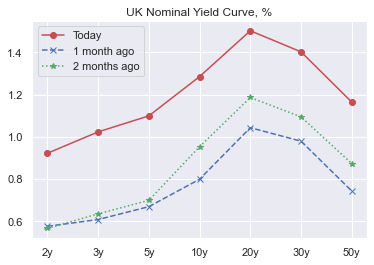

In [50]:
sns.set()

yieldcurve_vis = pd.concat([yieldcurve_today, yieldcurve_1m, yieldcurve_2m], axis=1)
yieldcurve_vis.columns = ['Today', '1 month ago', '2 months ago']

yieldcurve_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='UK Nominal Yield Curve, %')
pdf.savefig(dpi=300, bbox_inches='tight')

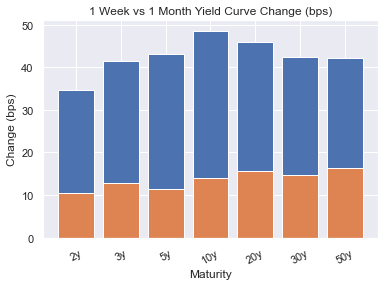

In [51]:
# BAR CHART OF ABSOLUTE CHANGES

# 1M CHANGE
yieldcurve_vis['Change (bps)'] = (yieldcurve_vis.iloc[:,0] - yieldcurve_vis.iloc[:,1]) * 100
indexNamesArr = yieldcurve_vis.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Month Yield Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, yieldcurve_vis['Change (bps)'])
plt.plot()

# 1W CHANGE
df_week_ago = pd.concat([yieldcurve_today, yieldcurve_1w], axis=1)
df_week_ago['Change (bps)'] = (df_week_ago.iloc[:,0] - df_week_ago.iloc[:,1]) * 100
indexNamesArr = df_week_ago.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Week vs 1 Month Yield Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, df_week_ago['Change (bps)'])
plt.plot()
pdf.savefig(dpi=300, bbox_inches='tight')

In [52]:
uk_yieldcurve_zscore = UK_yieldcurve.apply(stats.zscore)

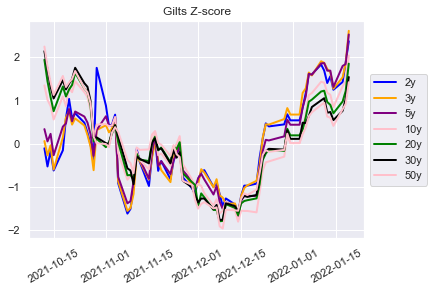

In [53]:
plt.plot(uk_yieldcurve_zscore.index, uk_yieldcurve_zscore['2y'],marker='', color='blue', linewidth=2, label="2y")
plt.plot(uk_yieldcurve_zscore.index, uk_yieldcurve_zscore['3y'],marker='', color='orange', linewidth=2, label="3y")
plt.plot(uk_yieldcurve_zscore.index, uk_yieldcurve_zscore['5y'],marker='', color='purple', linewidth=2, label="5y")
plt.plot(uk_yieldcurve_zscore.index, uk_yieldcurve_zscore['10y'],marker='', color='pink', linewidth=2, label="10y")
plt.plot(uk_yieldcurve_zscore.index, uk_yieldcurve_zscore['20y'],marker='', color='green', linewidth=2, label="20y")
plt.plot(uk_yieldcurve_zscore.index, uk_yieldcurve_zscore['30y'],marker='', color='black', linewidth=2, label="30y")
plt.plot(uk_yieldcurve_zscore.index, uk_yieldcurve_zscore['50y'],marker='', color='pink', linewidth=2, label="50y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Gilts Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***UK RPI Swap Curve***

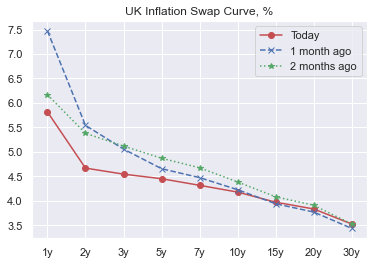

In [54]:
infswapcurve_vis = pd.concat([UK_ZCIScurve_today, UK_ZCIScurve_1m, UK_ZCIScurve_2m], axis=1)
infswapcurve_vis.columns = ['Today', '1 month ago', '2 months ago']

infswapcurve_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='UK Inflation Swap Curve, %')
pdf.savefig(dpi=300, bbox_inches='tight')

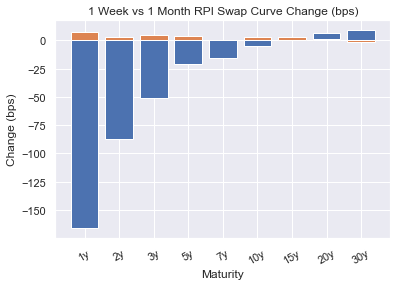

In [55]:
# BAR CHART OF ABSOLUTE CHANGES

# 1M CHANGE
infswapcurve_vis['Change (bps)'] = (infswapcurve_vis.iloc[:,0] - infswapcurve_vis.iloc[:,1]) * 100
indexNamesArr = infswapcurve_vis.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Month RPI Swap Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, infswapcurve_vis['Change (bps)'])
plt.plot()

# 1W CHANGE
df_week_ago = pd.concat([UK_ZCIScurve_today, UK_ZCIScurve_1w], axis=1)
df_week_ago['Change (bps)'] = (df_week_ago.iloc[:,0] - df_week_ago.iloc[:,1]) * 100
indexNamesArr = df_week_ago.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Week vs 1 Month RPI Swap Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, df_week_ago['Change (bps)'])
plt.plot()
pdf.savefig(dpi=300, bbox_inches='tight')

In [56]:
uk_ZCIScurve_zscore = UK_ZCIScurve.apply(stats.zscore)

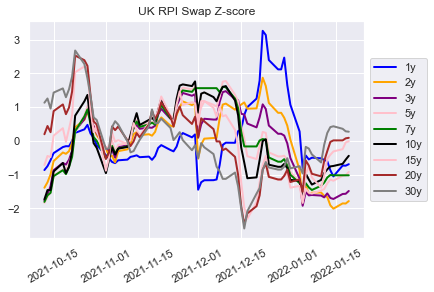

In [57]:
plt.plot(uk_ZCIScurve_zscore.index, uk_ZCIScurve_zscore['1y'],marker='', color='blue', linewidth=2, label="1y")
plt.plot(uk_ZCIScurve_zscore.index, uk_ZCIScurve_zscore['2y'],marker='', color='orange', linewidth=2, label="2y")
plt.plot(uk_ZCIScurve_zscore.index, uk_ZCIScurve_zscore['3y'],marker='', color='purple', linewidth=2, label="3y")
plt.plot(uk_ZCIScurve_zscore.index, uk_ZCIScurve_zscore['5y'],marker='', color='pink', linewidth=2, label="5y")
plt.plot(uk_ZCIScurve_zscore.index, uk_ZCIScurve_zscore['7y'],marker='', color='green', linewidth=2, label="7y")
plt.plot(uk_ZCIScurve_zscore.index, uk_ZCIScurve_zscore['10y'],marker='', color='black', linewidth=2, label="10y")
plt.plot(uk_ZCIScurve_zscore.index, uk_ZCIScurve_zscore['15y'],marker='', color='pink', linewidth=2, label="15y")
plt.plot(uk_ZCIScurve_zscore.index, uk_ZCIScurve_zscore['20y'],marker='', color='brown', linewidth=2, label="20y")
plt.plot(uk_ZCIScurve_zscore.index, uk_ZCIScurve_zscore['30y'],marker='', color='grey', linewidth=2, label="30y")



# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK RPI Swap Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***Inflation Breakevens Curve***

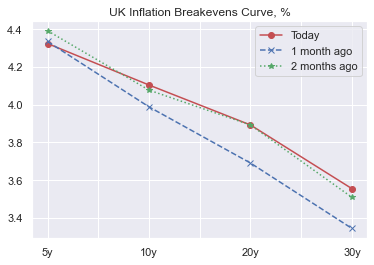

In [58]:
breakscurve_vis = pd.concat([UK_breakscurve_today, UK_breakscurve_1m, UK_breakscurve_2m], axis=1)
breakscurve_vis.columns = ['Today', '1 month ago', '2 months ago']

breakscurve_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='UK Inflation Breakevens Curve, %')
pdf.savefig(dpi=300, bbox_inches='tight')

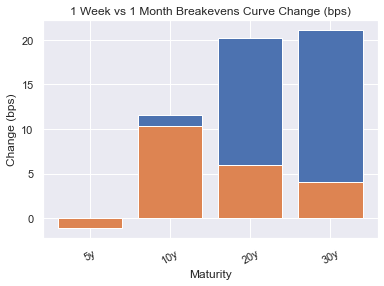

In [59]:
# BAR CHART OF ABSOLUTE CHANGES

# 1M CHANGE
breakscurve_vis['Change (bps)'] = (breakscurve_vis.iloc[:,0] - breakscurve_vis.iloc[:,1]) * 100
indexNamesArr = breakscurve_vis.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Month RPI Swap Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, breakscurve_vis['Change (bps)'])
plt.plot()

# 1W CHANGE
df_week_ago = pd.concat([UK_breakscurve_today, UK_breakscurve_1w], axis=1)
df_week_ago['Change (bps)'] = (df_week_ago.iloc[:,0] - df_week_ago.iloc[:,1]) * 100
indexNamesArr = df_week_ago.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Week vs 1 Month Breakevens Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, df_week_ago['Change (bps)'])
plt.plot()
pdf.savefig(dpi=300, bbox_inches='tight')

In [60]:
uk_breakscurve_zscore = UK_breakscurve.apply(stats.zscore)

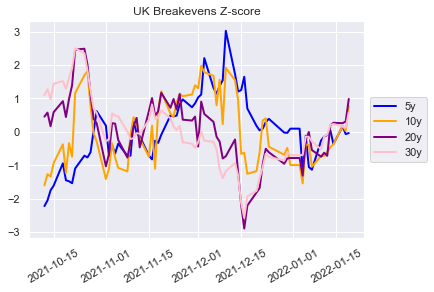

In [61]:
plt.plot(uk_breakscurve_zscore.index, uk_breakscurve_zscore['5y'],marker='', color='blue', linewidth=2, label="5y")
plt.plot(uk_breakscurve_zscore.index, uk_breakscurve_zscore['10y'],marker='', color='orange', linewidth=2, label="10y")
plt.plot(uk_breakscurve_zscore.index, uk_breakscurve_zscore['20y'],marker='', color='purple', linewidth=2, label="20y")
plt.plot(uk_breakscurve_zscore.index, uk_breakscurve_zscore['30y'],marker='', color='pink', linewidth=2, label="30y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK Breakevens Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***UK Linker Curve***

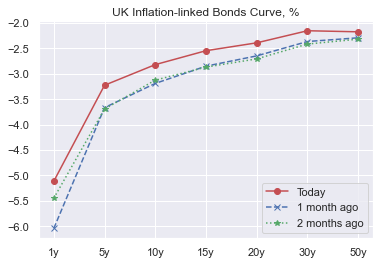

In [62]:
linkercurve_vis = pd.concat([UK_linkercurve_today, UK_linkercurve_1m, UK_linkercurve_2m], axis=1)
linkercurve_vis.columns = ['Today', '1 month ago', '2 months ago']

linkercurve_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='UK Inflation-linked Bonds Curve, %')
pdf.savefig(dpi=300, bbox_inches='tight')

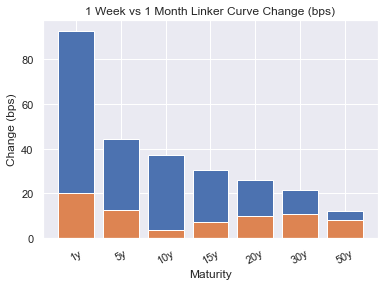

In [63]:
# BAR CHART OF ABSOLUTE CHANGES

# 1M CHANGE
linkercurve_vis['Change (bps)'] = (linkercurve_vis.iloc[:,0] - linkercurve_vis.iloc[:,1]) * 100
indexNamesArr = linkercurve_vis.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Month Linker Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, linkercurve_vis['Change (bps)'])
plt.plot()

# 1W CHANGE
df_week_ago = pd.concat([UK_linkercurve_today, UK_linkercurve_1w], axis=1)
df_week_ago['Change (bps)'] = (df_week_ago.iloc[:,0] - df_week_ago.iloc[:,1]) * 100
indexNamesArr = df_week_ago.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Week vs 1 Month Linker Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, df_week_ago['Change (bps)'])
plt.plot()
pdf.savefig(dpi=300, bbox_inches='tight')

In [64]:
uk_linkercurve_zscore = UK_linkercurve.apply(stats.zscore)

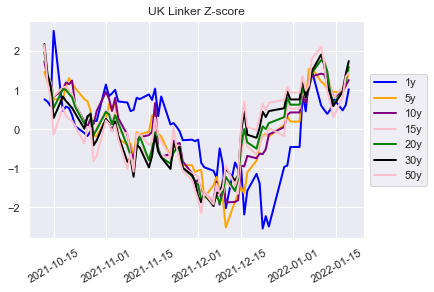

In [65]:
plt.plot(uk_linkercurve_zscore.index, uk_linkercurve_zscore['1y'],marker='', color='blue', linewidth=2, label="1y")
plt.plot(uk_linkercurve_zscore.index, uk_linkercurve_zscore['5y'],marker='', color='orange', linewidth=2, label="5y")
plt.plot(uk_linkercurve_zscore.index, uk_linkercurve_zscore['10y'],marker='', color='purple', linewidth=2, label="10y")
plt.plot(uk_linkercurve_zscore.index, uk_linkercurve_zscore['15y'],marker='', color='pink', linewidth=2, label="15y")
plt.plot(uk_linkercurve_zscore.index, uk_linkercurve_zscore['20y'],marker='', color='green', linewidth=2, label="20y")
plt.plot(uk_linkercurve_zscore.index, uk_linkercurve_zscore['30y'],marker='', color='black', linewidth=2, label="30y")
plt.plot(uk_linkercurve_zscore.index, uk_linkercurve_zscore['50y'],marker='', color='pink', linewidth=2, label="50y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK Linker Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***Forward Inflation Swaps Scatter***

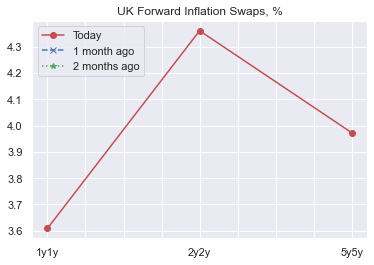

In [66]:
forwardinfswap_vis = pd.concat([UK_forwardinfswaps_today, UK_forwardinfswaps_1m, UK_forwardinfswaps_2m], axis=1)
forwardinfswap_vis.columns = ['Today', '1 month ago', '2 months ago']

forwardinfswap_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='UK Forward Inflation Swaps, %')
pdf.savefig(dpi=300, bbox_inches='tight')

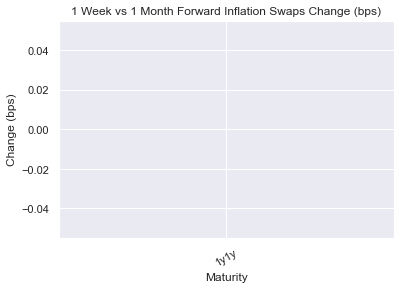

In [67]:
# BAR CHART OF ABSOLUTE CHANGES

# 1M CHANGE
forwardinfswap_vis['Change (bps)'] = (forwardinfswap_vis.iloc[:,0] - forwardinfswap_vis.iloc[:,1]) * 100
indexNamesArr = forwardinfswap_vis.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Month Linker Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, forwardinfswap_vis['Change (bps)'])
plt.plot()

# 1W CHANGE
df_week_ago = pd.concat([UK_forwardinfswaps_today, UK_forwardinfswaps_1w], axis=1)
df_week_ago['Change (bps)'] = (df_week_ago.iloc[:,0] - df_week_ago.iloc[:,1]) * 100
indexNamesArr = df_week_ago.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Week vs 1 Month Forward Inflation Swaps Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, df_week_ago['Change (bps)'])
plt.plot()
pdf.savefig(dpi=300, bbox_inches='tight')

***MPC OIS Fixings***

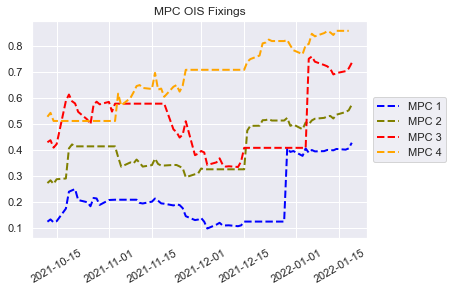

In [68]:
# MULTIPLE LINE PLOTS
plt.plot(MPC_1.index, MPC_1,marker='', color='blue', linewidth=2, linestyle='dashed', label="MPC 1")
plt.plot(MPC_2.index, MPC_2, marker='', color='olive', linewidth=2, linestyle='dashed', label="MPC 2")
plt.plot(MPC_3.index, MPC_3, marker='', color='red', linewidth=2, linestyle='dashed', label="MPC 3")
plt.plot(MPC_4.index, MPC_4, marker='', color='orange', linewidth=2, linestyle='dashed', label="MPC 4")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('MPC OIS Fixings')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

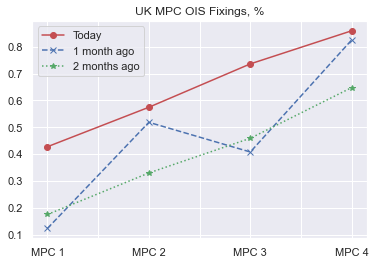

In [69]:
# MPC FIXINGS CURVE
MPCfixings_vis = pd.concat([UK_MPCfixingscurve_today, UK_MPCfixingscurve_1m, UK_MPCfixingscurve_2m], axis=1)
MPCfixings_vis.columns = ['Today', '1 month ago', '2 months ago']

MPCfixings_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='UK MPC OIS Fixings, %')
pdf.savefig(dpi=300, bbox_inches='tight')

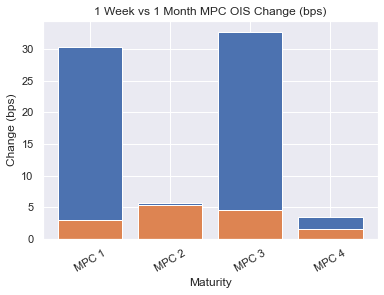

In [70]:
# BAR CHART OF ABSOLUTE CHANGES

# 1M CHANGE
MPCfixings_vis['Change (bps)'] = (MPCfixings_vis.iloc[:,0] - MPCfixings_vis.iloc[:,1]) * 100
indexNamesArr = MPCfixings_vis.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Month Linker Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, MPCfixings_vis['Change (bps)'])
plt.plot()

# 1W CHANGE
df_week_ago = pd.concat([UK_MPCfixingscurve_today, UK_MPCfixingscurve_1w], axis=1)
df_week_ago['Change (bps)'] = (df_week_ago.iloc[:,0] - df_week_ago.iloc[:,1]) * 100
indexNamesArr = df_week_ago.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Week vs 1 Month MPC OIS Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, df_week_ago['Change (bps)'])
plt.plot()
pdf.savefig(dpi=300, bbox_inches='tight')

***UK IRS Curve***

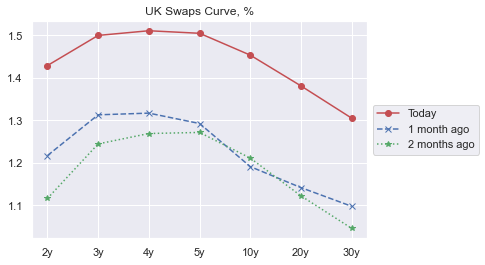

In [71]:
IRScurve_vis = pd.concat([UK_IRScurve_today, UK_IRScurve_1m, UK_IRScurve_2m], axis=1)
IRScurve_vis.columns = ['Today', '1 month ago', '2 months ago']

IRScurve_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='UK Swaps Curve, %')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pdf.savefig(dpi=300, bbox_inches='tight')

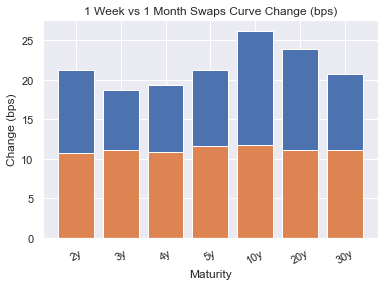

In [72]:
# BAR CHART OF ABSOLUTE CHANGES

# 1M CHANGE
IRScurve_vis['Change (bps)'] = (IRScurve_vis.iloc[:,0] - IRScurve_vis.iloc[:,1]) * 100
indexNamesArr = IRScurve_vis.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Month Linker Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, IRScurve_vis['Change (bps)'])
plt.plot()

# 1W CHANGE
df_week_ago = pd.concat([UK_IRScurve_today, UK_IRScurve_1w], axis=1)
df_week_ago['Change (bps)'] = (df_week_ago.iloc[:,0] - df_week_ago.iloc[:,1]) * 100
indexNamesArr = df_week_ago.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Week vs 1 Month Swaps Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, df_week_ago['Change (bps)'])
plt.plot()
pdf.savefig(dpi=300, bbox_inches='tight')

In [73]:
uk_IRScurve_zscore = UK_IRScurve.apply(stats.zscore)

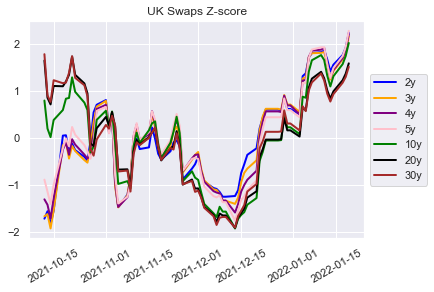

In [74]:
plt.plot(uk_IRScurve_zscore.index, uk_IRScurve_zscore['2y'],marker='', color='blue', linewidth=2, label="2y")
plt.plot(uk_IRScurve_zscore.index, uk_IRScurve_zscore['3y'],marker='', color='orange', linewidth=2, label="3y")
plt.plot(uk_IRScurve_zscore.index, uk_IRScurve_zscore['4y'],marker='', color='purple', linewidth=2, label="4y")
plt.plot(uk_IRScurve_zscore.index, uk_IRScurve_zscore['5y'],marker='', color='pink', linewidth=2, label="5y")
plt.plot(uk_IRScurve_zscore.index, uk_IRScurve_zscore['10y'],marker='', color='green', linewidth=2, label="10y")
plt.plot(uk_IRScurve_zscore.index, uk_IRScurve_zscore['20y'],marker='', color='black', linewidth=2, label="20y")
plt.plot(uk_IRScurve_zscore.index, uk_IRScurve_zscore['30y'],marker='', color='brown', linewidth=2, label="30y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK Swaps Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***UK STIR Futures***

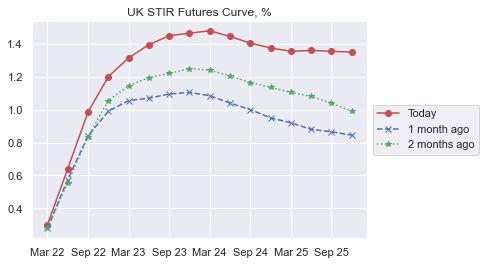

In [75]:
# CLASSIC CURVE
STIRcurve_vis = pd.concat([UK_STIRcurve_today, UK_STIRcurve_1m, UK_STIRcurve_2m], axis=1)
STIRcurve_vis.columns = ['Today', '1 month ago', '2 months ago']

STIRcurve_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='UK STIR Futures Curve, %')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pdf.savefig(dpi=300, bbox_inches='tight')

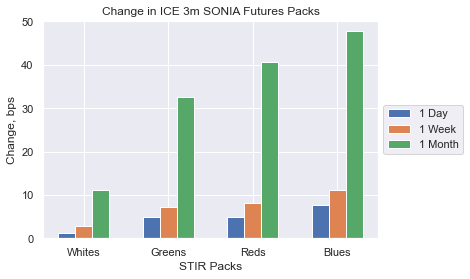

In [76]:
# BAR CHART OF 1D, 1W, 1M CHANGES
x = np.arange(4)
width = 0.20

plt.bar(x-0.2, change_1d, width)
plt.bar(x, change_1w, width)
plt.bar(x+0.2, change_1m, width)

plt.title("Change in ICE 3m SONIA Futures Packs")
plt.xticks(x, ['Whites', 'Greens', 'Reds', 'Blues'])
plt.xlabel("STIR Packs")
plt.ylabel("Change, bps")
plt.legend(["1 Day", "1 Week", "1 Month"], loc='center left', bbox_to_anchor=(1, 0.5))

pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

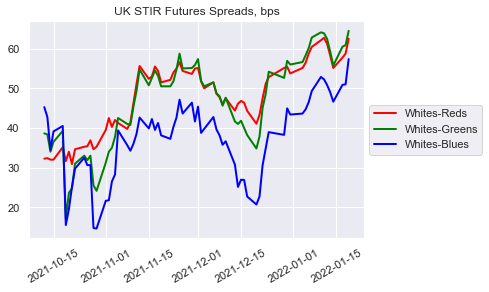

In [77]:
# SPREADS BETWEEN PACKS

# MULTIPLE LINE PLOTS
plt.plot(whites_reds.index, whites_reds['OPEN'],marker='', color='red', linewidth=2, label="Whites-Reds")
plt.plot(whites_greens.index, whites_greens['OPEN'], marker='', color='green', linewidth=2, label="Whites-Greens")
plt.plot(whites_blues.index, whites_blues['OPEN'], marker='', color='blue', linewidth=2, label="Whites-Blues")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK STIR Futures Spreads, bps')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

In [78]:
# Z SCORES
whites_zscore = whites_z_score.apply(stats.zscore)
greens_zscore = greens_z_score.apply(stats.zscore)
reds_zscore = reds_z_score.apply(stats.zscore)
blues_zscore = blues_z_score.apply(stats.zscore)

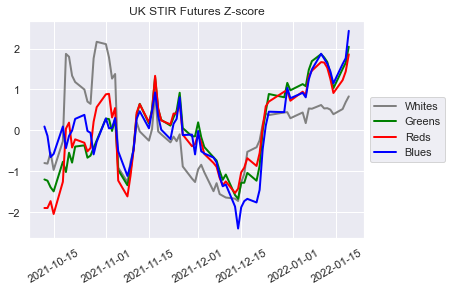

In [79]:
plt.plot(whites_zscore.index, whites_zscore['OPEN'],marker='', color='grey', linewidth=2, label="Whites")
plt.plot(greens_zscore.index, greens_zscore['OPEN'],marker='', color='green', linewidth=2, label="Greens")
plt.plot(reds_zscore.index, reds_zscore['OPEN'],marker='', color='red', linewidth=2, label="Reds")
plt.plot(blues_zscore.index, blues_zscore['OPEN'],marker='', color='blue', linewidth=2, label="Blues")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK STIR Futures Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***UK Swap Spreads***

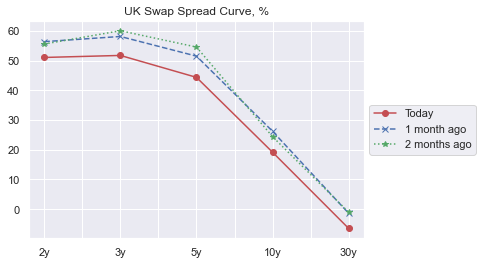

In [80]:
# SWAP SPREAD CURVE

swapspreadcurve_vis = pd.concat([UK_swapspreadcurve_today, UK_swapspreadcurve_1m, UK_swapspreadcurve_2m], axis=1)
swapspreadcurve_vis.columns = ['Today', '1 month ago', '2 months ago']

swapspreadcurve_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='UK Swap Spread Curve, %')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pdf.savefig(dpi=300, bbox_inches='tight')

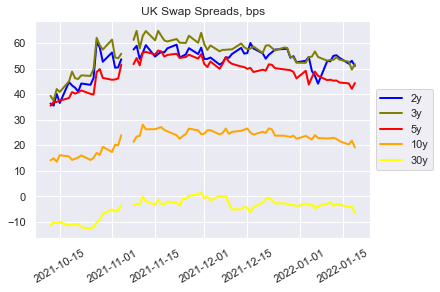

In [81]:
# MULTIPLE TIMESERIES IN ONE CHART
# MULTIPLE LINE PLOTS
plt.plot(uk_2y_swapspread.index, uk_2y_swapspread,marker='', color='blue', linewidth=2, label="2y")
plt.plot(uk_3y_swapspread.index, uk_3y_swapspread, marker='', color='olive', linewidth=2, label="3y")
plt.plot(uk_5y_swapspread.index, uk_5y_swapspread, marker='', color='red', linewidth=2, label="5y")
plt.plot(uk_10y_swapspread.index, uk_10y_swapspread, marker='', color='orange', linewidth=2, label="10y")
plt.plot(uk_30y_swapspread.index, uk_30y_swapspread, marker='', color='yellow', linewidth=2, label="30y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK Swap Spreads, bps')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

In [82]:
# Z SCORES
uk_swapspreadcurve_zscore = UK_swapspreadcurve.apply(stats.zscore)

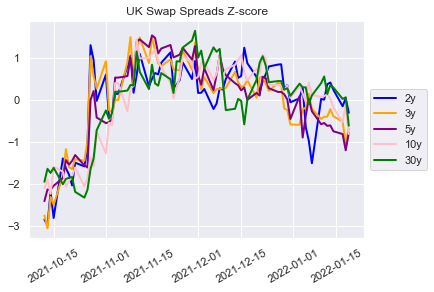

In [83]:
plt.plot(uk_swapspreadcurve_zscore.index, uk_swapspreadcurve_zscore['2y'],marker='', color='blue', linewidth=2, label="2y")
plt.plot(uk_swapspreadcurve_zscore.index, uk_swapspreadcurve_zscore['3y'],marker='', color='orange', linewidth=2, label="3y")
plt.plot(uk_swapspreadcurve_zscore.index, uk_swapspreadcurve_zscore['5y'],marker='', color='purple', linewidth=2, label="5y")
plt.plot(uk_swapspreadcurve_zscore.index, uk_swapspreadcurve_zscore['10y'],marker='', color='pink', linewidth=2, label="10y")
plt.plot(uk_swapspreadcurve_zscore.index, uk_swapspreadcurve_zscore['30y'],marker='', color='green', linewidth=2, label="30y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK Swap Spreads Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***OIS Curve***

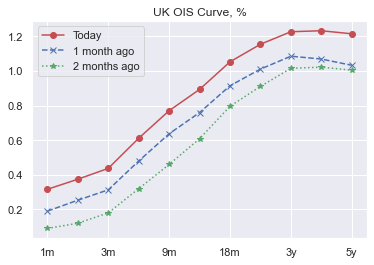

In [84]:
OIScurve_vis = pd.concat([UK_OIScurve_today, UK_OIScurve_1m, UK_OIScurve_2m], axis=1)
OIScurve_vis.columns = ['Today', '1 month ago', '2 months ago']

OIScurve_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='UK OIS Curve, %')
pdf.savefig(dpi=300, bbox_inches='tight')

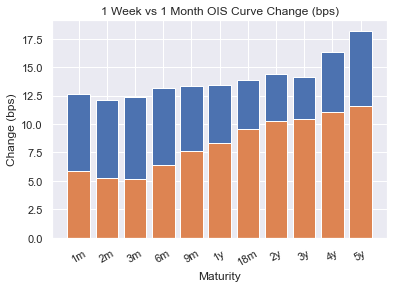

In [85]:
# BAR CHART OF ABSOLUTE CHANGES

# 1M CHANGE
OIScurve_vis['Change (bps)'] = (OIScurve_vis.iloc[:,0] - OIScurve_vis.iloc[:,1]) * 100
indexNamesArr = OIScurve_vis.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Month Linker Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, OIScurve_vis['Change (bps)'])
plt.plot()

# 1W CHANGE
df_week_ago = pd.concat([UK_OIScurve_today, UK_OIScurve_1w], axis=1)
df_week_ago['Change (bps)'] = (df_week_ago.iloc[:,0] - df_week_ago.iloc[:,1]) * 100
indexNamesArr = df_week_ago.index.values
listOfRowIndexLabels = list(indexNamesArr)
y_pos = np.arange(len(listOfRowIndexLabels))
plt.xticks(y_pos, listOfRowIndexLabels)
plt.xlabel("Maturity")
plt.ylabel("Change (bps)")
plt.title("1 Week vs 1 Month OIS Curve Change (bps)")
plt.xticks(rotation=30)
plt.bar(y_pos, df_week_ago['Change (bps)'])
plt.plot()
pdf.savefig(dpi=300, bbox_inches='tight')

In [86]:
uk_OIScurve_zscore = UK_OIScurve.apply(stats.zscore)

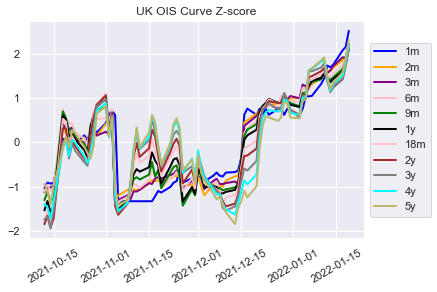

In [87]:
plt.plot(uk_OIScurve_zscore.index, uk_OIScurve_zscore['1m'],marker='', color='blue', linewidth=2, label="1m")
plt.plot(uk_OIScurve_zscore.index, uk_OIScurve_zscore['2m'],marker='', color='orange', linewidth=2, label="2m")
plt.plot(uk_OIScurve_zscore.index, uk_OIScurve_zscore['3m'],marker='', color='purple', linewidth=2, label="3m")
plt.plot(uk_OIScurve_zscore.index, uk_OIScurve_zscore['6m'],marker='', color='pink', linewidth=2, label="6m")
plt.plot(uk_OIScurve_zscore.index, uk_OIScurve_zscore['9m'],marker='', color='green', linewidth=2, label="9m")
plt.plot(uk_OIScurve_zscore.index, uk_OIScurve_zscore['1y'],marker='', color='black', linewidth=2, label="1y")
plt.plot(uk_OIScurve_zscore.index, uk_OIScurve_zscore['18m'],marker='', color='pink', linewidth=2, label="18m")
plt.plot(uk_OIScurve_zscore.index, uk_OIScurve_zscore['2y'],marker='', color='brown', linewidth=2, label="2y")
plt.plot(uk_OIScurve_zscore.index, uk_OIScurve_zscore['3y'],marker='', color='grey', linewidth=2, label="3y")
plt.plot(uk_OIScurve_zscore.index, uk_OIScurve_zscore['4y'],marker='', color='aqua', linewidth=2, label="4y")
plt.plot(uk_OIScurve_zscore.index, uk_OIScurve_zscore['5y'],marker='', color='darkkhaki', linewidth=2, label="5y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK OIS Curve Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***UK Cash Z-score Matrices***

/Users/matteoloria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/Users/matteoloria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


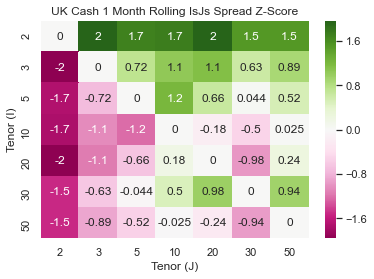

In [88]:
#COMPOSING MATRIX
tenors = [2,3,5,10,20,30,50]

df_spread = pd.DataFrame() 
df_spread['Tenors'] = tenors
for t in tenors: 
    df_spread[t] = [None]*len(tenors) 
df_spread = df_spread.set_index(df_spread['Tenors'], inplace=False, drop=True)

#print(df_spread)
for i in tenors: 
    for j in tenors: 
        #print(j, i)
        sspread = UK_yieldcurve[str(j)+'y'] - UK_yieldcurve[str(i)+'y'] 
        #print(sspread)
        #print(sspread.dtype)
        x = sspread[-1]
        mean = sspread[-31:-1].mean()#spot fix for rolling data
        sigma = sspread[-31:-1].std(ddof=1)

        z = (x-mean)/sigma
        #print(z)
        #print(x, mean, sigma)

        #appointt to "slot" 
        try:
            df_spread[j][i] = round(z,5)
        except:
            pass

#j - i and col = j ; rows = i 
df_spread = df_spread.drop(columns='Tenors')
df_spread = df_spread.fillna(0)
#print(df_spread)

plt.figure()
ax = sns.heatmap(df_spread, cmap='PiYG', annot=True)
ax.set_xlabel("Tenor (J)")
ax.set_ylabel("Tenor (I)")
ax.set_title('UK Cash 1 Month Rolling IsJs Spread Z-Score')

pdf.savefig(dpi=300, bbox_inches='tight')

/Users/matteoloria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


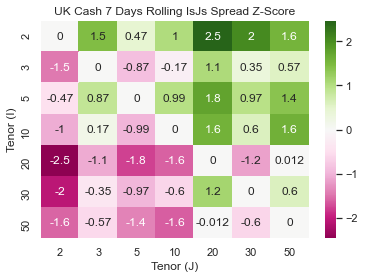

In [89]:
for i in tenors: 
    for j in tenors: 
        #print(j, i)
        sspread = UK_yieldcurve[str(j)+'y'] - UK_yieldcurve[str(i)+'y'] 
        #print(sspread)
        #print(sspread.dtype)
        x = sspread[-1]
        mean = sspread[-8:-1].mean()#spot fix for rolling data
        sigma = sspread[-8:-1].std(ddof=1)

        z = (x-mean)/sigma
        #print(z)
        #print(x, mean, sigma)

        #appointt to "slot" 
        try:
            df_spread[j][i] = round(z,5)
        except:
            pass

#j - i and col = j ; rows = i 
#df_spread = df_spread.drop(columns='Tenors')
df_spread = df_spread.fillna(0)
#print(df_spread)

sns.set() 
plt.figure()
ax = sns.heatmap(df_spread, cmap='PiYG', annot=True)
ax.set_xlabel("Tenor (J)")
ax.set_ylabel("Tenor (I)")
ax.set_title('UK Cash 7 Days Rolling IsJs Spread Z-Score')

pdf.savefig(dpi=300, bbox_inches='tight')

***Swaps Z-score Matrices***

/Users/matteoloria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/Users/matteoloria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


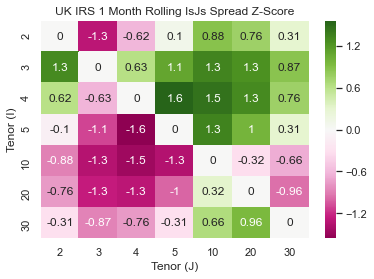

In [90]:
tenors = [2, 3, 4, 5, 10, 20, 30]

df_spread = pd.DataFrame() 
df_spread['Tenors'] = tenors
for t in tenors: 
    df_spread[t] = [None]*len(tenors) 
df_spread = df_spread.set_index(df_spread['Tenors'], inplace=False, drop=True)

for i in tenors: 
    for j in tenors: 
        #print(j, i)
        sspread = UK_IRScurve[str(j)+'y'] - UK_IRScurve[str(i)+'y'] 
        #print(sspread)
        #print(sspread.dtype)
        x = sspread[-1]
        mean = sspread[-31:-1].mean()#spot fix for rolling data
        sigma = sspread[-31:-1].std(ddof=1)

        z = (x-mean)/sigma
        #print(z)
        #print(x, mean, sigma)

        #appointt to "slot" 
        try:
            df_spread[j][i] = round(z,5)
        except:
            pass

#j - i and col = j ; rows = i 
df_spread = df_spread.drop(columns='Tenors')
df_spread = df_spread.fillna(0)
#print(df_spread)

plt.figure()
ax = sns.heatmap(df_spread, cmap='PiYG', annot=True)
ax.set_xlabel("Tenor (J)")
ax.set_ylabel("Tenor (I)")
ax.set_title('UK IRS 1 Month Rolling IsJs Spread Z-Score')

pdf.savefig(dpi=300, bbox_inches='tight')

/Users/matteoloria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


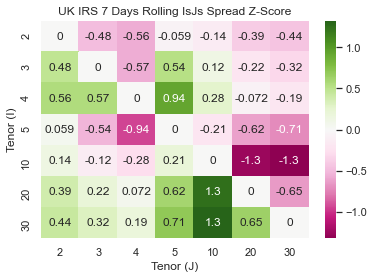

In [91]:
for i in tenors: 
    for j in tenors: 
        #print(j, i)
        sspread = UK_IRScurve[str(j)+'y'] - UK_IRScurve[str(i)+'y'] 
        #print(sspread)
        #print(sspread.dtype)
        x = sspread[-1]
        mean = sspread[-8:-1].mean()#spot fix for rolling data
        sigma = sspread[-8:-1].std(ddof=1)

        z = (x-mean)/sigma
        #print(z)
        #print(x, mean, sigma)

        #appointt to "slot" 
        try:
            df_spread[j][i] = round(z,5)
        except:
            pass

#j - i and col = j ; rows = i 
#df_spread = df_spread.drop(columns='Tenors')
df_spread = df_spread.fillna(0)
#print(df_spread)

sns.set() 
plt.figure()
ax = sns.heatmap(df_spread, cmap='PiYG', annot=True)
ax.set_xlabel("Tenor (J)")
ax.set_ylabel("Tenor (I)")
ax.set_title('UK IRS 7 Days Rolling IsJs Spread Z-Score')

pdf.savefig(dpi=300, bbox_inches='tight')

***Cash Curve Spreads***

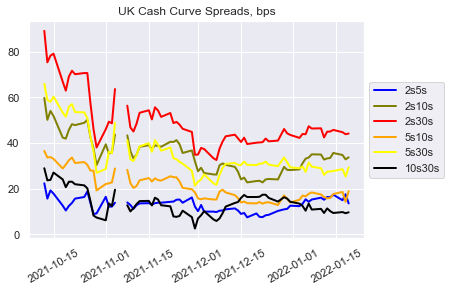

In [92]:
# MULTIPLE LINE PLOTS
plt.plot(UK_2s5s.index, UK_2s5s,marker='', color='blue', linewidth=2, label="2s5s")
plt.plot(UK_2s10s.index, UK_2s10s, marker='', color='olive', linewidth=2, label="2s10s")
plt.plot(UK_2s30s.index, UK_2s30s, marker='', color='red', linewidth=2, label="2s30s")
plt.plot(UK_5s10s.index, UK_5s10s, marker='', color='orange', linewidth=2, label="5s10s")
plt.plot(UK_5s30s.index, UK_5s30s, marker='', color='yellow', linewidth=2, label="5s30s")
plt.plot(UK_10s30s.index, UK_10s30s, marker='', color='black', linewidth=2, label="10s30s")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK Cash Curve Spreads, bps')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

In [93]:
# CREATE DATAFRAME
UK_curvespreads = pd.DataFrame([UK_2s5s, UK_2s10s, UK_2s30s, UK_5s10s, UK_5s30s, UK_10s30s]).transpose()

# RENAME COLUMNS
UK_curvespreads.columns = ['2s5s', '2s10s', '2s30s', '5s10s', '5s30s', '10s30s']

UK_curvespreads = UK_curvespreads.fillna(method='ffill')

#UK_butterflies.tail()

uk_curvespreads_zscore = UK_curvespreads.apply(stats.zscore)

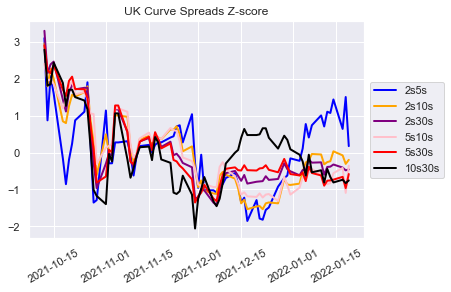

In [94]:
plt.plot(uk_curvespreads_zscore.index, uk_curvespreads_zscore['2s5s'],marker='', color='blue', linewidth=2, label="2s5s")
plt.plot(uk_curvespreads_zscore.index, uk_curvespreads_zscore['2s10s'],marker='', color='orange', linewidth=2, label="2s10s")
plt.plot(uk_curvespreads_zscore.index, uk_curvespreads_zscore['2s30s'],marker='', color='purple', linewidth=2, label="2s30s")
plt.plot(uk_curvespreads_zscore.index, uk_curvespreads_zscore['5s10s'],marker='', color='pink', linewidth=2, label="5s10s")
plt.plot(uk_curvespreads_zscore.index, uk_curvespreads_zscore['5s30s'],marker='', color='red', linewidth=2, label="5s30s")
plt.plot(uk_curvespreads_zscore.index, uk_curvespreads_zscore['10s30s'],marker='', color='black', linewidth=2, label="10s30s")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK Curve Spreads Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***Cash Flies***

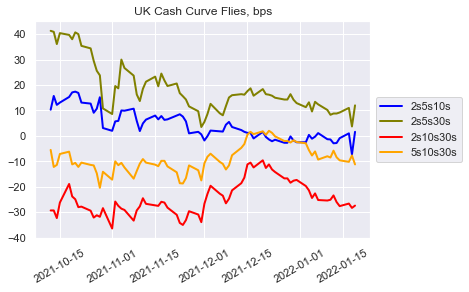

In [95]:
# MULTIPLE LINE PLOTS
plt.plot(UK_2s5s10s.index, UK_2s5s10s,marker='', color='blue', linewidth=2, label="2s5s10s")
plt.plot(UK_2s5s30s.index, UK_2s5s30s, marker='', color='olive', linewidth=2, label="2s5s30s")
plt.plot(UK_2s10s30s.index, UK_2s10s30s, marker='', color='red', linewidth=2, label="2s10s30s")
plt.plot(UK_5s10s30s.index, UK_5s10s30s, marker='', color='orange', linewidth=2, label="5s10s30s")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK Cash Curve Flies, bps')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

In [96]:
# CREATE DATAFRAME
UK_butterflies = pd.DataFrame([UK_2s5s10s, UK_2s5s30s, UK_2s10s30s, UK_5s10s30s]).transpose()

# RENAME COLUMNS
UK_butterflies.columns = ['2s5s10s', '2s5s30s', '2s10s30s', '5s10s30s']

UK_butterflies = UK_butterflies.fillna(method='ffill')

#UK_butterflies.tail()

uk_butterflies_zscore = UK_butterflies.apply(stats.zscore)

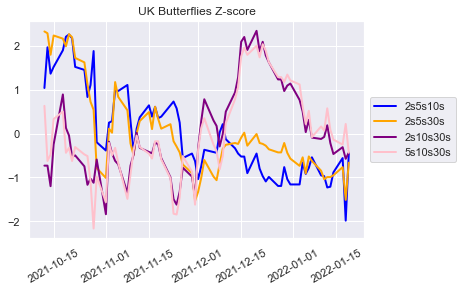

In [97]:
plt.plot(uk_butterflies_zscore.index, uk_butterflies_zscore['2s5s10s'],marker='', color='blue', linewidth=2, label="2s5s10s")
plt.plot(uk_butterflies_zscore.index, uk_butterflies_zscore['2s5s30s'],marker='', color='orange', linewidth=2, label="2s5s30s")
plt.plot(uk_butterflies_zscore.index, uk_butterflies_zscore['2s10s30s'],marker='', color='purple', linewidth=2, label="2s10s30s")
plt.plot(uk_butterflies_zscore.index, uk_butterflies_zscore['5s10s30s'],marker='', color='pink', linewidth=2, label="5s10s30s")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK Butterflies Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***Cash vs OIS***

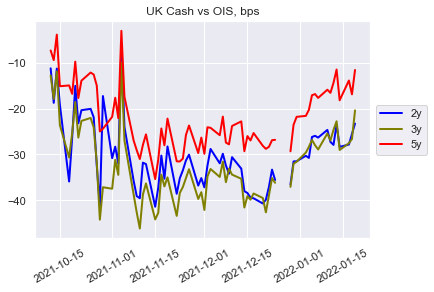

In [98]:
# MULTIPLE LINE PLOTS
plt.plot(cashOIS_2y.index, cashOIS_2y,marker='', color='blue', linewidth=2, label="2y")
plt.plot(cashOIS_3y.index, cashOIS_3y, marker='', color='olive', linewidth=2, label="3y")
plt.plot(cashOIS_5y.index, cashOIS_5y, marker='', color='red', linewidth=2, label="5y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK Cash vs OIS, bps')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

In [99]:
# CREATE DATAFRAME
UK_cashvsOIS = pd.DataFrame([cashOIS_2y['2y'], cashOIS_3y['3y'], cashOIS_5y['5y']]).transpose()

# RENAME COLUMNS
UK_cashvsOIS.columns = ['2y', '3y', '5y']

UK_cashvsOIS = UK_cashvsOIS.fillna(method='ffill')

#UK_cashvsOIS.tail()

uk_cashvsOIS_zscore = UK_cashvsOIS.apply(stats.zscore)

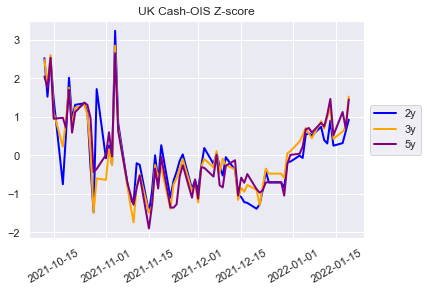

In [100]:
plt.plot(uk_cashvsOIS_zscore.index, uk_cashvsOIS_zscore['2y'],marker='', color='blue', linewidth=2, label="2y")
plt.plot(uk_cashvsOIS_zscore.index, uk_cashvsOIS_zscore['3y'],marker='', color='orange', linewidth=2, label="3y")
plt.plot(uk_cashvsOIS_zscore.index, uk_cashvsOIS_zscore['5y'],marker='', color='purple', linewidth=2, label="5y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('UK Cash-OIS Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***Gilts vs Bunds***

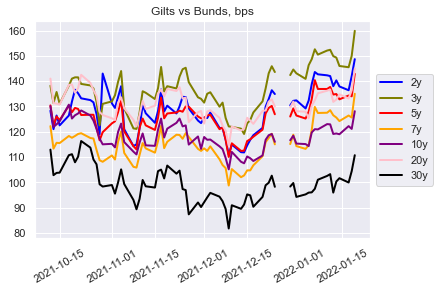

In [101]:
# MULTIPLE LINE PLOTS
plt.plot(giltbund_2y.index, giltbund_2y,marker='', color='blue', linewidth=2, label="2y")
plt.plot(giltbund_3y.index, giltbund_3y, marker='', color='olive', linewidth=2, label="3y")
plt.plot(giltbund_5y.index, giltbund_5y, marker='', color='red', linewidth=2, label="5y")
plt.plot(giltbund_7y.index, giltbund_7y,marker='', color='orange', linewidth=2, label="7y")
plt.plot(giltbund_10y.index, giltbund_10y, marker='', color='purple', linewidth=2, label="10y")
plt.plot(giltbund_20y.index, giltbund_20y, marker='', color='pink', linewidth=2, label="20y")
plt.plot(giltbund_30y.index, giltbund_30y, marker='', color='black', linewidth=2, label="30y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Gilts vs Bunds, bps')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

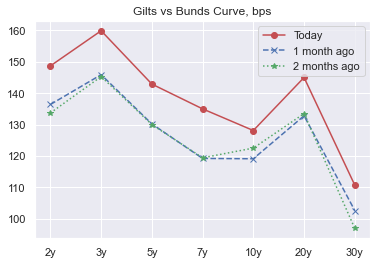

In [102]:
giltbundcurve_vis = pd.concat([giltbundcurve_today, giltbundcurve_1m, giltbundcurve_2m], axis=1)
giltbundcurve_vis.columns = ['Today', '1 month ago', '2 months ago']

giltbundcurve_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='Gilts vs Bunds Curve, bps')
pdf.savefig(dpi=300, bbox_inches='tight')

In [103]:
giltbunds_zscore = giltbundcurve.apply(stats.zscore)

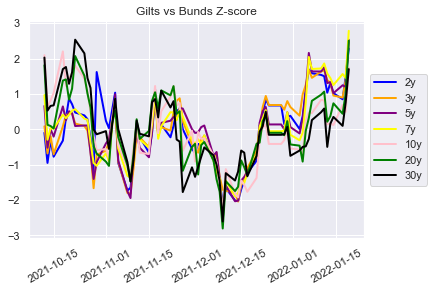

In [104]:
plt.plot(giltbunds_zscore.index, giltbunds_zscore['2y'],marker='', color='blue', linewidth=2, label="2y")
plt.plot(giltbunds_zscore.index, giltbunds_zscore['3y'],marker='', color='orange', linewidth=2, label="3y")
plt.plot(giltbunds_zscore.index, giltbunds_zscore['5y'],marker='', color='purple', linewidth=2, label="5y")
plt.plot(giltbunds_zscore.index, giltbunds_zscore['7y'],marker='', color='yellow', linewidth=2, label="7y")
plt.plot(giltbunds_zscore.index, giltbunds_zscore['10y'],marker='', color='pink', linewidth=2, label="10y")
plt.plot(giltbunds_zscore.index, giltbunds_zscore['20y'],marker='', color='green', linewidth=2, label="20y")
plt.plot(giltbunds_zscore.index, giltbunds_zscore['30y'],marker='', color='black', linewidth=2, label="30y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Gilts vs Bunds Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

***Gilts vs USTs***

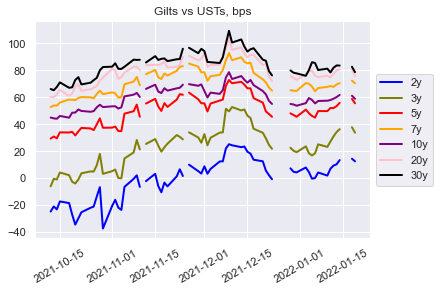

In [105]:
# MULTIPLE LINE PLOTS
plt.plot(giltust_2y.index, giltust_2y,marker='', color='blue', linewidth=2, label="2y")
plt.plot(giltust_3y.index, giltust_3y, marker='', color='olive', linewidth=2, label="3y")
plt.plot(giltust_5y.index, giltust_5y, marker='', color='red', linewidth=2, label="5y")
plt.plot(giltust_7y.index, giltust_7y,marker='', color='orange', linewidth=2, label="7y")
plt.plot(giltust_10y.index, giltust_10y, marker='', color='purple', linewidth=2, label="10y")
plt.plot(giltust_20y.index, giltust_20y, marker='', color='pink', linewidth=2, label="20y")
plt.plot(giltust_30y.index, giltust_30y, marker='', color='black', linewidth=2, label="30y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Gilts vs USTs, bps')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

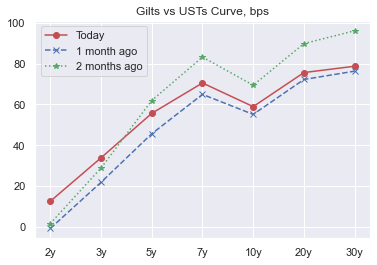

In [106]:
giltustcurve_vis = pd.concat([giltustcurve_today, giltustcurve_1m, giltustcurve_2m], axis=1)
giltustcurve_vis.columns = ['Today', '1 month ago', '2 months ago']

giltustcurve_vis.plot(style={'Today': 'ro-', '1 month ago': 'bx--', '2 months ago': 'g*:'}
        ,title='Gilts vs USTs Curve, bps')
pdf.savefig(dpi=300, bbox_inches='tight')

In [107]:
giltust_zscore = giltustcurve.apply(stats.zscore)

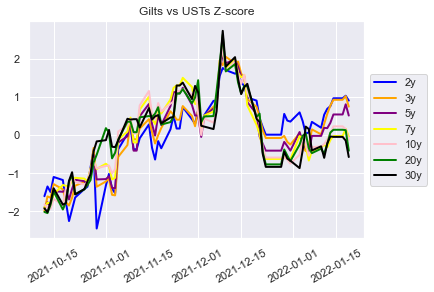

In [108]:
plt.plot(giltust_zscore.index, giltust_zscore['2y'],marker='', color='blue', linewidth=2, label="2y")
plt.plot(giltust_zscore.index, giltust_zscore['3y'],marker='', color='orange', linewidth=2, label="3y")
plt.plot(giltust_zscore.index, giltust_zscore['5y'],marker='', color='purple', linewidth=2, label="5y")
plt.plot(giltust_zscore.index, giltust_zscore['7y'],marker='', color='yellow', linewidth=2, label="7y")
plt.plot(giltust_zscore.index, giltust_zscore['10y'],marker='', color='pink', linewidth=2, label="10y")
plt.plot(giltust_zscore.index, giltust_zscore['20y'],marker='', color='green', linewidth=2, label="20y")
plt.plot(giltust_zscore.index, giltust_zscore['30y'],marker='', color='black', linewidth=2, label="30y")

# SHOW LEGEND
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Gilts vs USTs Z-score')
plt.xticks(rotation=30)

# SHOW GRAPH
pdf.savefig(dpi=300, bbox_inches='tight')
plt.show()

In [109]:
pdf.close()

# Linear Regressions

In [110]:
import statsmodels.api as sm

In [111]:
# CREATE DIFFERENCE COLUMN
df_2s5s10s = ek.get_timeseries('GB2X5X10=RR')
df_2s5s30s = ek.get_timeseries('GB2X5X30=RR')
df_2s5s10s['1d Change'] = df_2s5s10s['OPEN'] - df_2s5s10s['OPEN'].shift(1)
df_2s5s30s['1d Change'] = df_2s5s30s['OPEN'] - df_2s5s30s['OPEN'].shift(1)

# CLEAN DATA

df_2s5s10s = df_2s5s10s.dropna()
df_2s5s30s = df_2s5s30s.dropna()

In [112]:
# Provide data and transform inputs
x, y = np.array(df_2s5s10s['1d Change']), np.array(df_2s5s30s['1d Change'])
x = sm.add_constant(x)

# Create a model and fit it
model = sm.OLS(y, x)

# Get results
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     89.65
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           4.22e-14
Time:                        13:55:54   Log-Likelihood:                -169.21
No. Observations:                  71   AIC:                             342.4
Df Residuals:                      69   BIC:                             346.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2971      0.317     -0.938      0.351      -0.929       0.335
x1             1.1278      0.119      9.468      0.000       0.890       1.365
==============================================================================
Omnibus:                        1.726   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.064
Skew:                           0.122   Prob(JB):                        0.588
Kurtosis:                       3.547   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Random Analysis

In [113]:
df_2s5s10s.describe()

GB2X5X10=RR,HIGH,VALUE,LOW,OPEN,CLOSE,COUNT,1d Change
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,7.400000,4.159155,1.501408,4.522535,4.159155,145.492958,-0.209859
std,6.017736,5.855902,6.407284,5.826570,5.855902,1234.371603,2.669679
min,-2.700000,-7.300000,-14.100000,-2.900000,-7.300000,-1.000000,-12.900000
25%,2.800000,-0.350000,-2.550000,-0.250000,-0.350000,-1.000000,-1.500000
50%,7.100000,2.000000,1.200000,2.300000,2.000000,-1.000000,-0.100000
75%,12.250000,7.900000,5.500000,8.000000,7.900000,-1.000000,1.300000
max,25.300000,17.400000,16.000000,17.500000,17.400000,10400.000000,5.200000


In [114]:
# Get day of week
df_2s5s10s['Day of Week'] = df_2s5s10s.index.weekday

# Group by Day of week and compare 1w change
df_2s5s10s_groupedby_day = df_2s5s10s.groupby('Day of Week')
df_2s5s10s_groupedby_day.mean()

GB2X5X10=RR,HIGH,VALUE,LOW,OPEN,CLOSE,COUNT,1d Change
Day of Week,,,,,,,
0,6.750000,4.178571,1.464286,4.185714,4.178571,-1.0,-0.978571
1,6.792857,3.235714,0.542857,4.200000,3.235714,-1.0,0.014286
2,7.780000,4.453333,1.340000,4.386667,4.453333,692.4,-0.586667
3,7.692857,5.057143,2.357143,4.685714,5.057143,-1.0,0.050000
4,7.957143,3.850000,1.814286,5.164286,3.850000,-1.0,0.478571
